# 1.Задача поиска максимального подмассива

Допустим, мы знаем цены акций наперед. Наша задача - максимизировать прибыль, купив подешевле, а продав - подороже.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data1 = [100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 79]

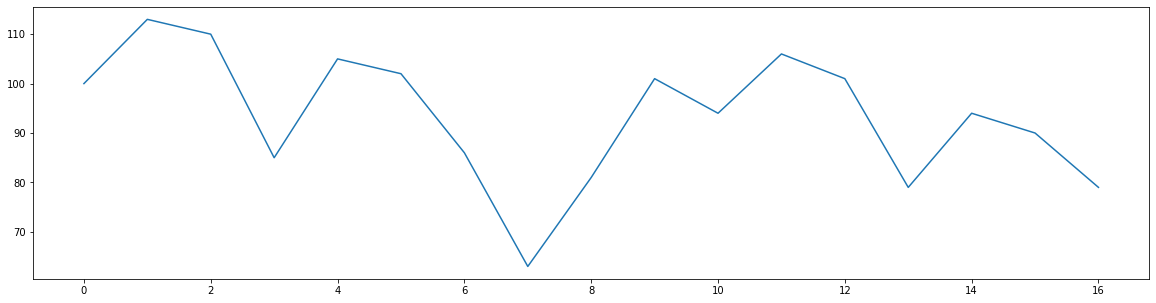

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(data1)

Сначала попробуем грубой силой - перебираем все цены от первой до предпоследней и к каждой такой цене ищем пару из будущего, обеспечивающую максимальную разницу между ценой покупки и продажи. Сложность у такого алгоритма, понятно, равна $O(n^2)$.

In [4]:
def get_max_subarray_bruteforce(data: list[int]) -> (int, int):
    buy_day = 0 
    sell_day = len(data) - 1
    max_diff = data[sell_day] - data[buy_day]
    for i in range(len(data) - 1):
        for j in range(i + 1, len(data)):
            if (data[j] - data[i]) > max_diff:
                max_diff = data[j] - data[i]
                buy_day, sell_day = i, j
    return buy_day, sell_day

In [5]:
buy_day, sell_day = get_max_subarray_bruteforce(data1)
print(f'buy_day = {buy_day}, sell_day = {sell_day}, profit = {data1[sell_day] - data1[buy_day]}')

buy_day = 7, sell_day = 11, profit = 43


Немножко отвлечемся на обозначения асимптотической сложности алгоритмов.

1. Обозначение $\Theta(g(n))$ говорит нам, что существуют такие положительные константы $c_1$ и $c_2$, что 
$$0 \le c_1g(n) \le f(n) \le c_2g(n)$$ для всех $n \gt n_0$, где $f(n)$ - это реальное время выполнения алгоритма. Говоря менее формально, $\Theta(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее и сверху и снизу.

2. Обозначение $O(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее только сверху, т.е. в данном случае зависимость $g(n)$ - это наихудший из вариантов.

3. Обозначение $\Omega(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее только снизу, т.е. в данном случае зависимость $g(n)$ - это наилучший из вариантов.

4. Обозначение $o(g(n))$ показывает неточную верхнюю оценку асимптотической сложности алгоритма. Так, например, если запись $2n = O(n^2)$ является неправильной, то запись $2n = o(n^2)$ является абсолютно корректной.

5. Обозначение $\omega(g(n))$ показывает неточную нижнюю оценку асимптотической сложности алгоритма.

Теперь попробуем разработать алгоритм на основе подхода "разделяй и властвуй". Предположим, что мы хотим найти максимальный подмассив подмассива `A[low..high]`. Подход "разделяй и властвуй" предполагает, что мы делим этот подмассив на 2 подмассива по возможности одинакового размера: `A[low..mid]` и `A[mid+1..high]`. А из этого следует, что любой непрерывный подмассив `A[i..j]` подмассива `A[low..high]` будет находится в одном из следующих положений:

1. Полностью в левом хвосте подмассива `A[low..high]`, т.е. в подмассиве `A[low..mid]`.  
2. Полностью в правом хвосте подмассива `A[low..high]`, т.е. в подмассиве `A[mid+1..high]`.  
3. Частично в лемов хвосте, а частично - в правом, т.е. пересекать точку `mid`.  

Из всего этого следует вот такой порядок действий:
1. Пишем функцию, ищущую максимальный подмассив среди всех подмассивов, пересекающих точку `mid`. Она обходит исходный массив с начала до середины и ищет минимальную цену. После этого обходит исходный массив с конца до середины и ищет максимальную цену. В итоге минимальная и максимальная цены и образуют максимальный подмассив.
2. Пишем функцию, вызывающую предыдущую функцию, а также вызывающую саму себя для левого и правого хвоста и выбирающую масимальный подмассив из 3. Саму себя функция должна вызывать, пока длина анализируемого массива составляет более 1 элемента. В противном случае этот единственный элемент и возвращается, как максимальный подмассив

In [6]:
def get_max_subarray_middle(data: list[int]) -> (int, int):    
    l_res, r_res = 0, len(data) - 1
    min_price, max_price = data[l_res], data[r_res]
    section = len(data) // 2
    for i in range(section):
        if data[i] < min_price:
            l_res, min_price = i, data[i]
    for j in range(len(data) - 1, section - 1, -1):
        if data[j] > max_price:
            r_res, max_price = j, data[j]
    return (l_res, r_res)

def get_max_subarray(data: list[int]) -> (int, int):
    if(len(data) == 1):
        return (0, 1)
    section = len(data) // 2
    middle_l, middle_h = get_max_subarray_middle(data)
    left_l, left_h = get_max_subarray(data[:section])
    right_l, right_h = get_max_subarray(data[section:])
    if len(data) > 2:
        right_l += section
        right_h += section
    max_profit = data[middle_h] - data[middle_l]
    l, r = middle_l, middle_h
    if max_profit < data[left_h] - data[left_l]:
        max_profit = data[left_h] - data[left_l]
        l, r = left_l, left_h
    if max_profit < data[right_h] - data[right_l]:
        max_profit = data[right_h] - data[right_l]
        l, r = right_l, right_h
    return (l, r)

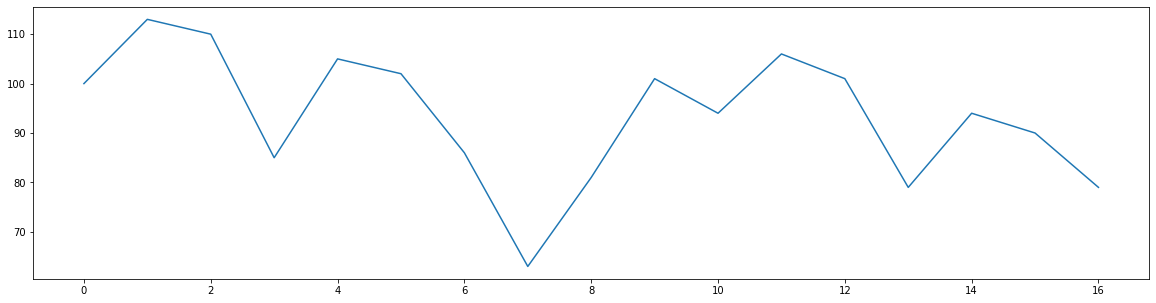

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(data1)

In [8]:
max_l, max_h = get_max_subarray(data1)
print(f'opening price (day {max_l}) = {data1[max_l]}, closing price (day {max_h}) = {data1[max_h]}')

opening price (day 7) = 63, closing price (day 11) = 106


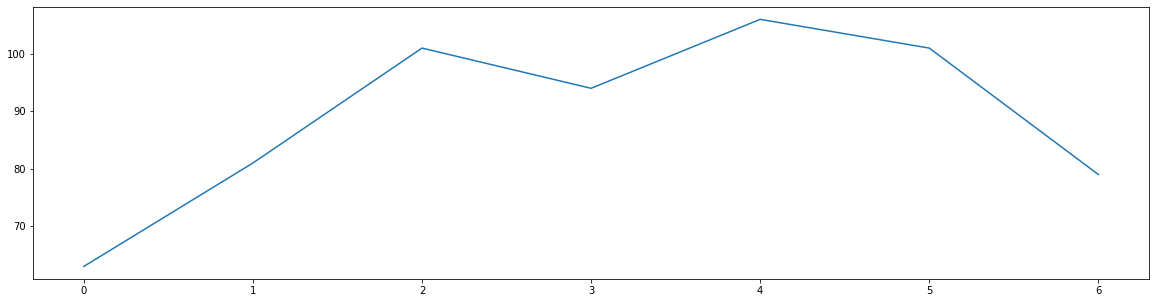

In [9]:
data2 = [63, 81, 101, 94, 106, 101, 79]
plt.figure(figsize=(20, 5))
plt.plot(data2)

In [10]:
max_l, max_h = get_max_subarray(data2)
print(f'opening price (day {max_l}) = {data2[max_l]}, closing price (day {max_h}) = {data2[max_h]}')

opening price (day 0) = 63, closing price (day 4) = 106


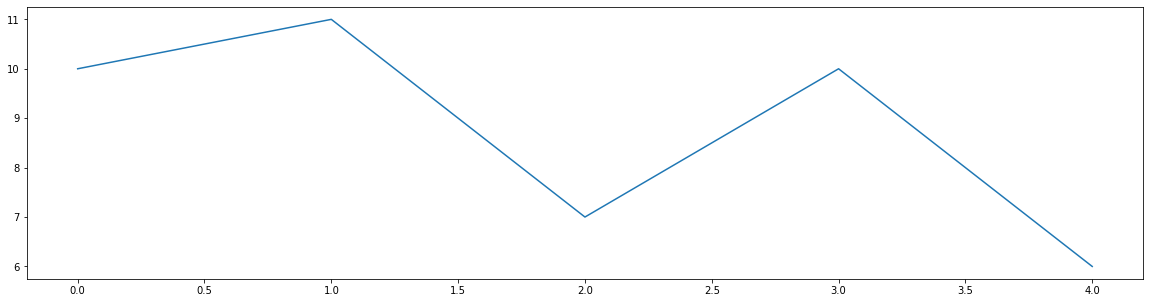

In [11]:
data3 = [10, 11, 7, 10, 6]
plt.figure(figsize=(20, 5))
plt.plot(data3)

In [12]:
max_l, max_h = get_max_subarray(data3)
print(f'opening price (day {max_l}) = {data3[max_l]}, closing price (day {max_h}) = {data3[max_h]}')

opening price (day 2) = 7, closing price (day 3) = 10


Реализованный алгоритм отрабатывает за время $\Theta(nln(n))$. А теперь попробуем создать алгоритм поиска максим